<div style="text-align: center;">
    <img src="../images/ga_logo_large.png" width="45%" style="display:inline;">
    <img src="../images/pipistrello.png" width="45%" style="display:inline;">
</div>

---
## **Project 3: Web APIs and NLP**

----
### **Exploratory Data Analysis and Visualizations**

In [8]:
# import libraries needed for this notebook

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [62]:
# read in clean file from previous notebook
file_path = '../data/clean_data/reddit.csv'

reddit = pd.read_csv(file_path)

# check dimensions
reddit.shape

(2226, 7)

In [64]:
# check some rows
reddit.head()

,post_title,post_text,post_title_length,post_title_wc,post_text_length,post_text_wc,topic
0,Monemvasia in December?,Im thinking about travelling to Monemvasia wit...,23,3,209,38,1
1,Vietjetair.com. DOB format is a problem,I attempted to enter my information on [Vietje...,40,7,506,85,1
2,First-Time Homebuyers Torn Between House or Mo...,(Edit: Thanks everyone for responses was very ...,70,10,3057,547,0
3,Arriving at IAD Washington for the first time,I’m Autistic and I’m going in January and I wi...,46,9,1212,244,1
4,Ask for permission or beg for forgiveness?,80% of my backyard is technically not mine. It...,43,8,846,149,0


This dataset is clean and all columns are cast to correct data type. Dive right into EDA and visualization.

---
### **Functions**
Non-native functions applicable to this notebook are listed in this section.

**Plot histogram and boxplot for a column**

In [114]:
def plot_hist_box(df, col_name, title = '', xlabel = ''):
    '''
    This function plots a histogram and a boxplot of a column.
    
    Parameters:
    col_name: string, this is the column's name
    title: string, the plot title.  Default value is a blank string.
    xlabel: string, the x-axis label.  Default value is a blank string.
    
    Return:
    It returns two plots.  A histogram on the left and a boxplot on the right.
    '''

    plt.figure(figsize = (16, 6))

    plot1 = plt.subplot(1, 2, 1)  # for histogram
    plot2 = plt.subplot(1, 2, 2)  # for box plot

    # histogram ---------------------------------------------------------------------------------------------
    plot1.hist(df[col_name], bins = 25, color = '#00bcd4', edgecolor = '#ffffff');
    plot1.set_title(title, fontweight = 'bold', color = '#6e6e6e', fontsize = 14)
    plot1.set_xlabel(xlabel, color = '#6e6e6e', fontsize = 14)
    plot1.spines['top'].set_visible(False)
    plot1.spines['right'].set_visible(False)
    plot1.tick_params(axis = 'both', which = 'both', colors = '#6e6e6e', labelsize = 12);
    
    
    # box plot -----------------------------------------------------------------------------------------------
    sns.boxplot(data = df[col_name], ax = plot2, orient = 'h', color = '#00bcd4', medianprops = {'color':'#FFFFFF'});
    plot2.set_title(title, fontweight = 'bold', color = '#6e6e6e', fontsize = 14);
    plot2.spines['top'].set_visible(False)
    plot2.spines['left'].set_visible(False)
    plot2.spines['right'].set_visible(False)
    plot2.set_xlabel(xlabel, color = '#6e6e6e', fontsize = 14)
    plot2.tick_params(axis = 'x', which = 'both', colors = '#6e6e6e', labelsize = 12);

**Plot density distributions of selected feature**

In [367]:
def plot_density(col, legend1, legend2, title, df = reddit, target = 'topic'):
    
    plt.figure(figsize = (12, 4))

    sns.kdeplot(df[df[target] == 0][col], fill = True, color = '#003366', label = legend1)
    plt.axvline(df[df[target] == 0][col].mean(), color = '#0D4B9B', linestyle = '--',
                label = f'Mean: {round(df[df[target] == 0][col].mean(), 2)}')

    sns.kdeplot(df[df[target] == 1][col], fill = True, color = '#00bcd4', label = legend2)
    plt.axvline(df[df[target] == 1][col].mean(), color = '#006B3F', linestyle = '--',
                label = f'Mean: {round(df[df[target] == 1][col].mean(), 2)}')

    plt.title(title, fontweight = 'bold', color = '#6e6e6e', fontsize = 12)
    plt.ylabel('Density Distribution', color = '#6e6e6e', fontsize = 12)
    plt.xlabel('Word Count', color = '#6e6e6e', fontsize = 12)

    ax = plt.gca()
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['bottom'].set_color('#6e6e6e')
    ax.spines['left'].set_color('#6e6e6e')
    ax.tick_params(axis='both', colors='#6e6e6e')
    
    plt.legend(frameon = False)
    
    plt.show();

# source for density plots: https://python-graph-gallery.com/74-density-plot-of-several-variables/

**Plot heatmap for given number of columns**

In [76]:
def plot_heatmap(columns):
    '''
    This function plots a heatmap of the number of columns passed in.
    
    Parameters:
    columns: list, a list of columns to plot.
    
    Return:
    It returns a heatmap of the columns.
    '''

    plt.figure(figsize = (6, 6))

    # heatmap setup
    corrs = round(ames[columns].corr(), 2)
    mask = np.zeros_like(corrs)
    mask[np.triu_indices_from(mask)] = True

    # plot heatmap
    sns.heatmap(corrs,
                square = True,
                annot = True,
                cmap = 'bone',
                mask = mask,
                vmin = -1,
                vmax = 1);

----
### **Text Data**
Read the first 10 post titles and corresponding blurbs to get an idea of what's going on with these posts.

In [92]:
for i in range(10):
    print(reddit.loc[i,'post_title'])
    print(reddit.loc[i,'post_text'])
    print('='*125)

Monemvasia in December?
Im thinking about travelling to Monemvasia with my partner in December. We plan to stay 10-14 days but are worried that there won’t be much to do.

Is it worth us only staying for a couple of nights instead?


Vietjetair.com.  DOB format is a problem
I attempted to enter my information on [Vietjetair.com](http://Vietjetair.com) to purchase a one-way international ticket. When I entered my date of birth, the format specified "D/M/year," so I entered 13/8/xxxx. However, as soon as I entered the last digit of the year, the date I entered automatically defaulted to 12. I'm not sure why that happened. On the other hand, when I entered 8/13/xx, it was accepted. What should I do now? I can't enter dates that are not in their specified format.  Pls help..
First-Time Homebuyers Torn Between House or Mobile Home—Help Us Decide
(Edit: Thanks everyone for responses was very helpful and actually learned quite a bit! A lot of this is pretty basic I am sure for most you but yo

**Observations**: Based on the reading, building a classifier to tell whether a post belongs to the real estate category or the travel category should not be as challenging.  There are certain key words that help identify the nature of the topic.<br>
**Real Estate** related words: _house, condo, property, trailer park, mortgage, downpayment, interest rate, agent, home, backyard, warehouse, building, land, contract_.<br>
**Travel** related words: _the names of places (i.e. continents, countries, cities, etc.), airport, airport codes, dates (i.e. day of the week, month, year, day), overseas, country, beach, surfing, culture, nightlife, international, ticket, ecolodge, airbnb, hotel, nature, chalet, restaurant, drive, holiday, trip_.

----
### **Correlations**
Explore correlations between different features.  Start with a pairplot.

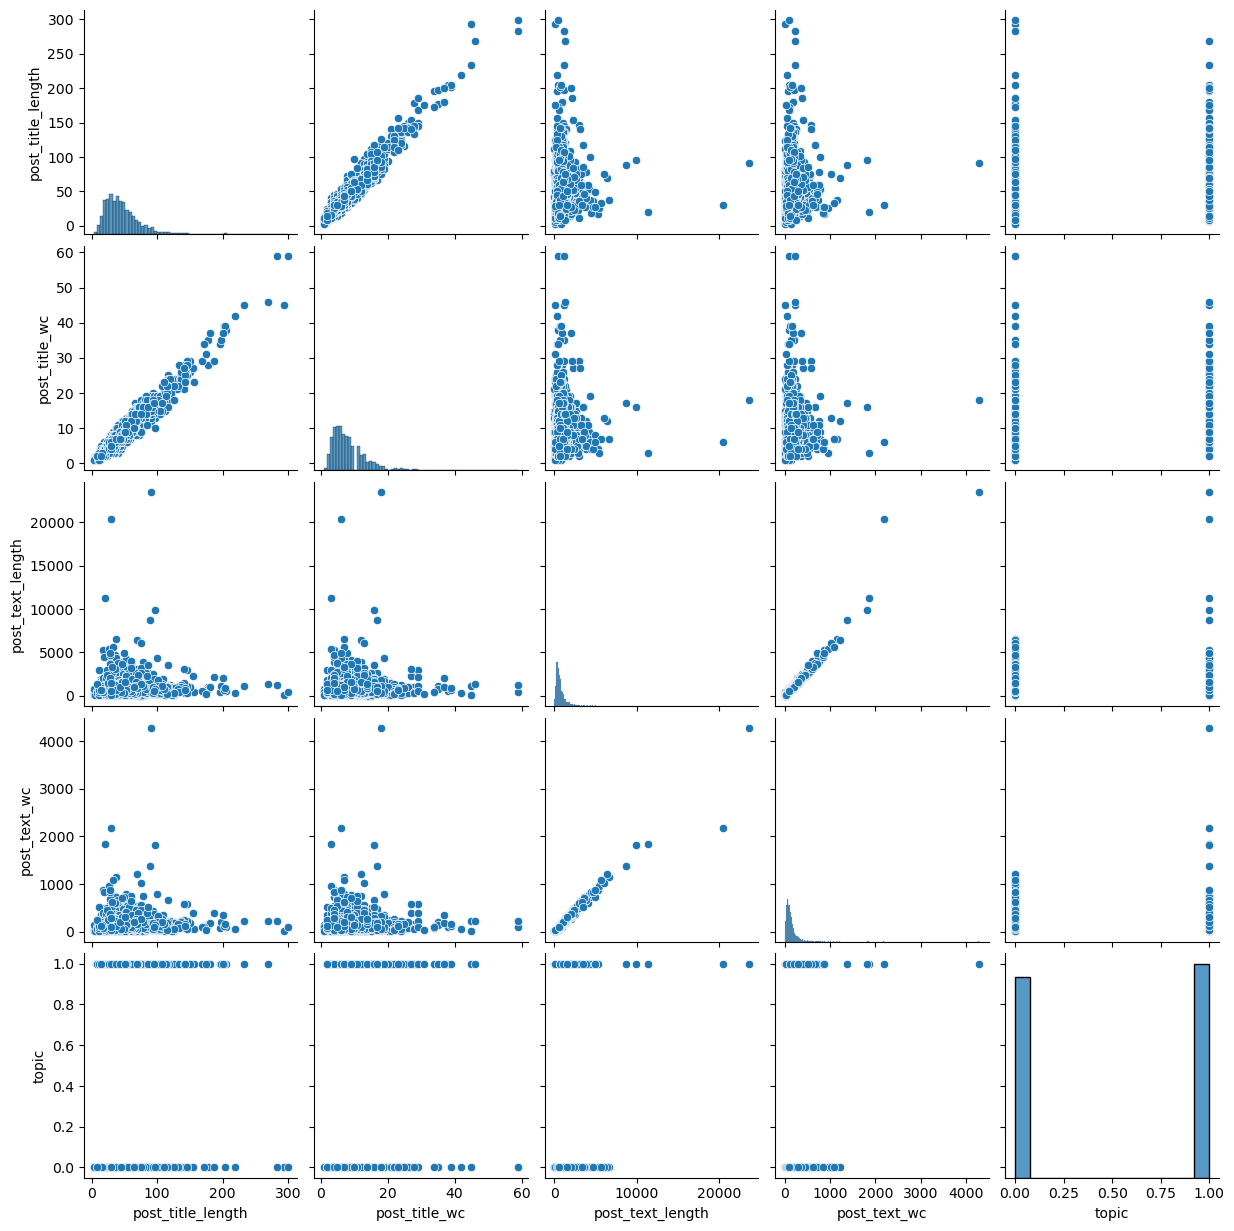

In [100]:
sns.pairplot(reddit);

**Observations**: Nothing particularly striking or surprising.  It is obvious that the longer a title or post is, the greater the number of words.

---
**Post Titles: Lengths**<br>
Explore distribution of title lengths, both overall and by topic.

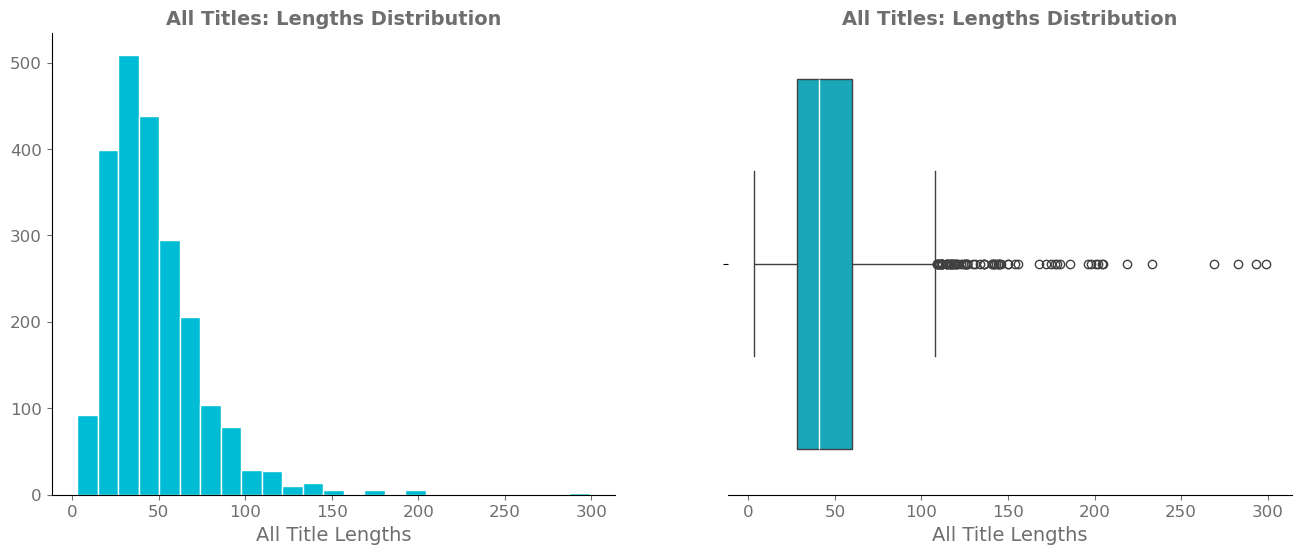

In [266]:
plot_hist_box(reddit, 'post_title_length', 'All Titles: Lengths Distribution', 'All Title Lengths')

Titles, by default, are not supposed to be very long, so taking a look at the outliers shown in the boxplot might provide some insights.  First, let's see the summary stats for `post_title_length`.

In [130]:
reddit['post_title_length'].describe()

count    2226.000000
mean       47.479335
std        29.326627
min         3.000000
25%        28.000000
50%        41.000000
75%        60.000000
max       299.000000
Name: post_title_length, dtype: float64

In [197]:
third_quart1 = reddit['post_title_length'].quantile(0.75)
third_quart1

60.0

How many titles have lengths over 60 characters?

In [199]:
print(f"Titles over 60 characters long: {reddit[reddit['post_title_length'] > third_quart1].shape[0]}")
print(f"Percent of dataset: {round(reddit[reddit['post_title_length'] > third_quart1].shape[0]/reddit.shape[0], 2)*100}")

Titles over 60 characters long: 536
Percent of dataset: 24.0


A quarter of posts have 'unusually long' titles.  What's the breakdown by topic?

In [207]:
reddit[reddit['post_title_length'] > third_quart1]['topic'].value_counts()

topic
0    270
1    266
Name: count, dtype: int64

Pretty even split between Real Estate title lengths and Travel title lengths.  Let's read the top 3 posts with the longest titles to see what they're about.

In [254]:
top3_titles = reddit[reddit['post_title_length'] > third_quart1].sort_values(by = 'post_title_length', ascending = False).head(3)

for title, text in zip(top3_titles['post_title'], top3_titles['post_text']):
    print(title)
    print('.'*125)
    print(text)
    print('='*125)
    print('='*125)

Signed a buyer's agreement with agent that I owe 2% of home sale price.  Made an offer and it the seller is offering additional 1% to my buyer's agent (to make it 3% total).  However, I told him he cannot get that extra money as our agreement is 2% and to recounter the home's price that difference.
.............................................................................................................................
Since the commission law has now changed and I'm paying him, I know that the seller "offering" it really is coming out of my amount because it's making the home price higher than what it should be.  We signed and agreed at 2% so I don't think he should be getting an extra 1% in the deal.  I know I sound like an ahole but the money in the transaction only comes from the buyer (me).  Curious who is correct with the new regulations now.
I am a student and have a simple question about foreclosure proceedings in US. We all know that some states allow the foreclosure procee

**Observations**: There seems to be nothing really special about these 'unusually long' titles.  Based on the readings above, the post title and text are basically whole posts that have been either accidentally or purposely split into two sections. There might be no need to explore these particular situations.<br>
Continue assessing distibution of title lengths.  This time by topic.

**Real Estate**

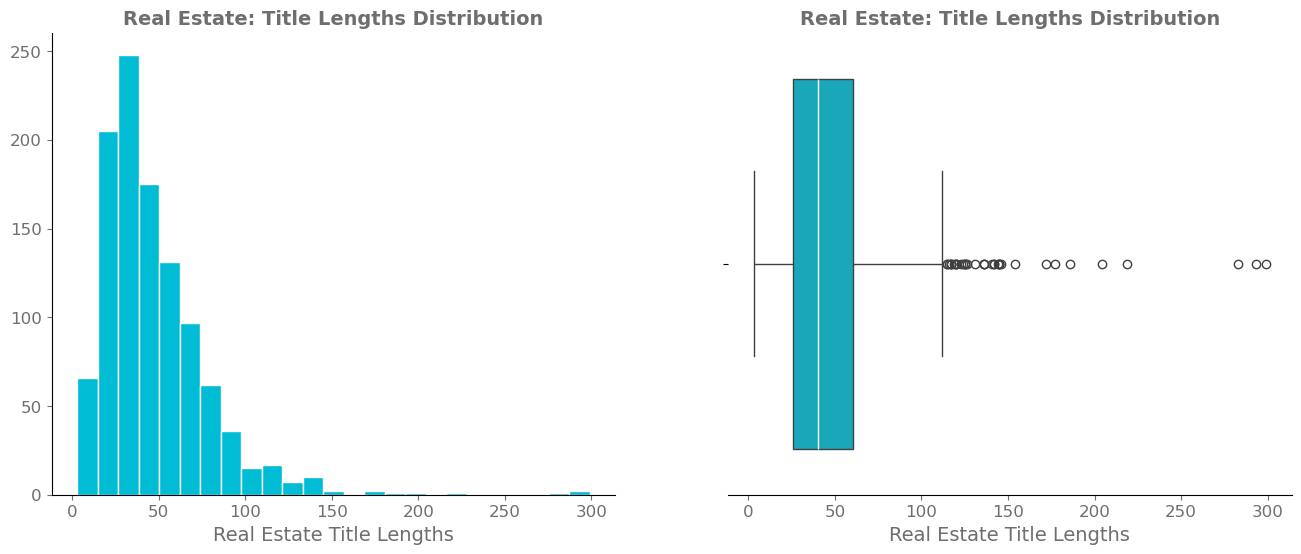

In [285]:
plot_hist_box(reddit[reddit['topic'] == 0],  # Real Estate posts are marked as 0
              'post_title_length',
              'Real Estate: Title Lengths Distribution',
              'Real Estate Title Lengths')

**Travel**

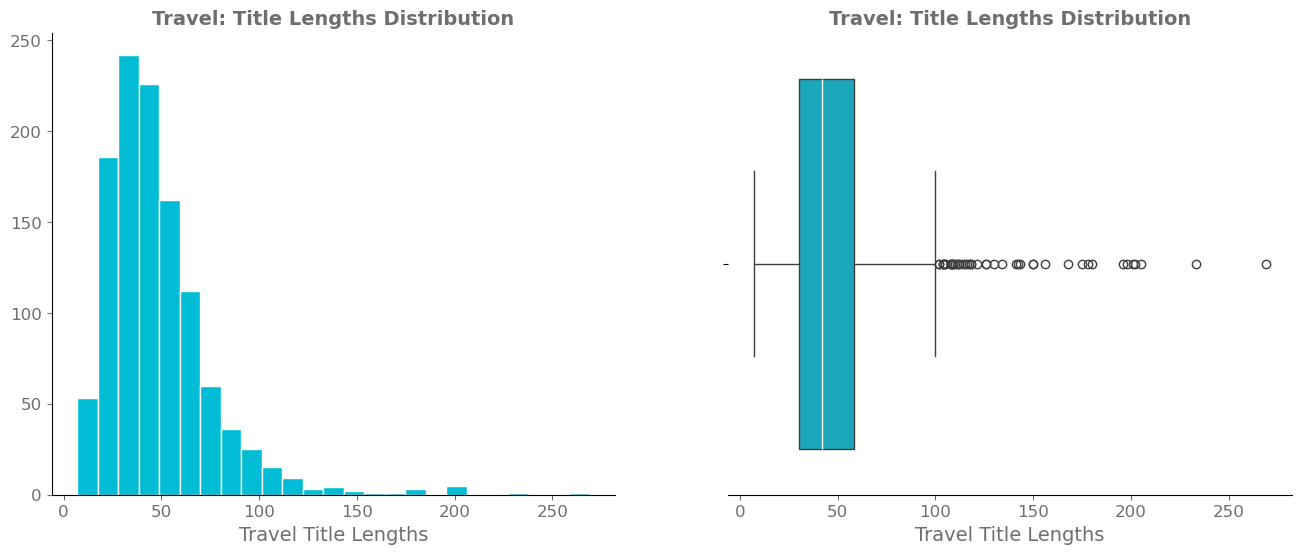

In [287]:
plot_hist_box(reddit[reddit['topic'] == 1],  # Travel posts are marked as 1
              'post_title_length',
              'Travel: Title Lengths Distribution',
              'Travel Title Lengths')

**Observations**: The distributions for each topic look similar, with the same tendency for outliers above the 75th percentile. Based on what was explored earlier with the whole population, no further analysis will be conducted into title lengths.

---
**Post Text: Lengths**<br>
Explore distribution of posts text lengths by topic.

**Real Estate**

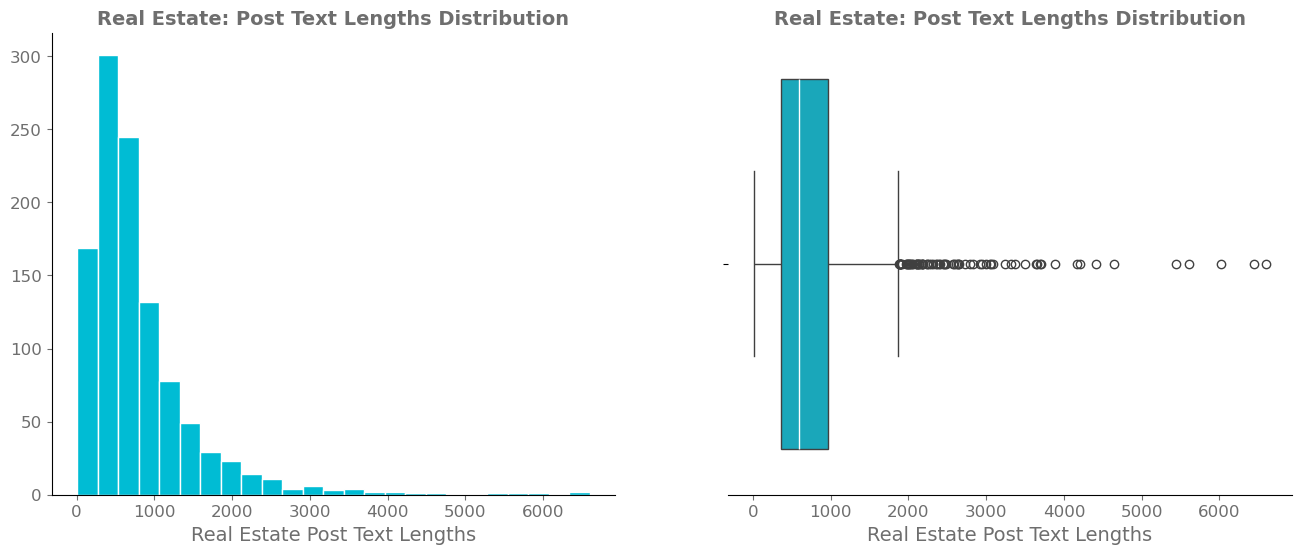

In [282]:
plot_hist_box(reddit[reddit['topic'] == 0],
              'post_text_length',
              'Real Estate: Post Text Lengths Distribution',
              'Real Estate Post Text Lengths')

**Travel**

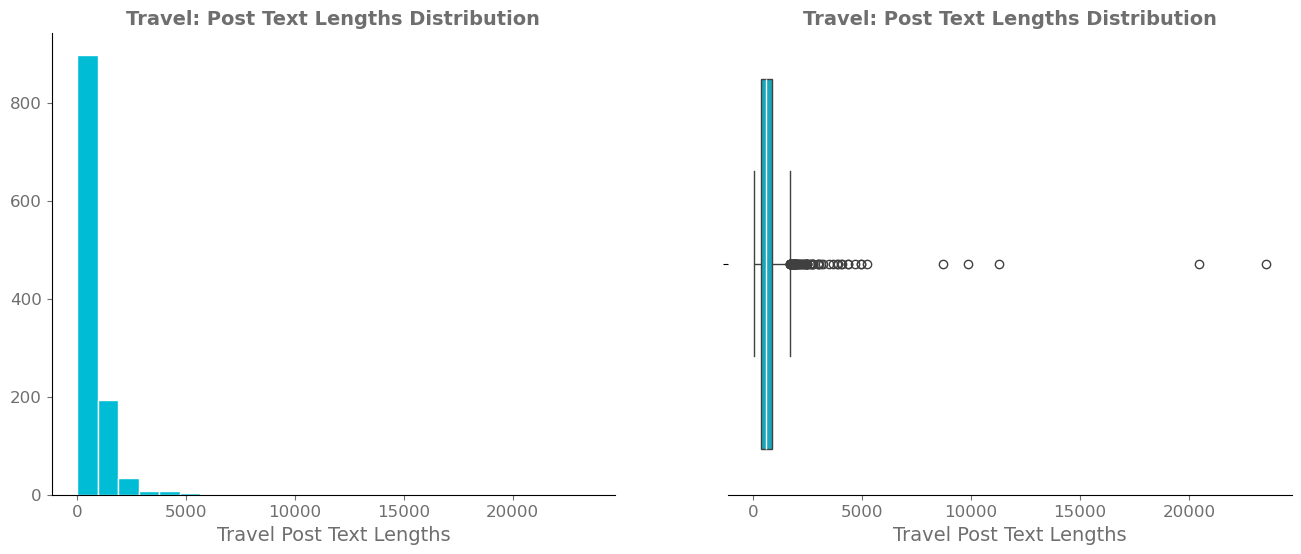

In [292]:
plot_hist_box(reddit[reddit['topic'] == 1],
              'post_text_length',
              'Travel: Post Text Lengths Distribution',
              'Travel Post Text Lengths')

**Observations**: Interesting insight, by looking at the x-axis scale on these plots, once notices that posts about travel, in specific the outliers, are way longer than posts about real estate.  Let's check the averages for both.

In [313]:
# mean for post text length: real estate
print(f"Real Estate: Avg. length of a post text: {round(reddit[reddit['topic'] == 0]['post_text_length'].mean(), 2)}")

# mean for post text length: travel
print(f"Travel: Avg. length of a post text: {round(reddit[reddit['topic'] == 1]['post_text_length'].mean(), 2)}")

Real Estate: Avg. length of a post text: 792.84
Travel: Avg. length of a post text: 783.39


Interestingly, the averages are very close to each other, but the outliers in the travel category are skewing the distribution a lot more.<br>
No further exploration needed for lengths on this EDA iteration. Let's now check word counts.

---
**Post Titles: Word Count**<br>
Explore distribution of word counts in titles by topic.

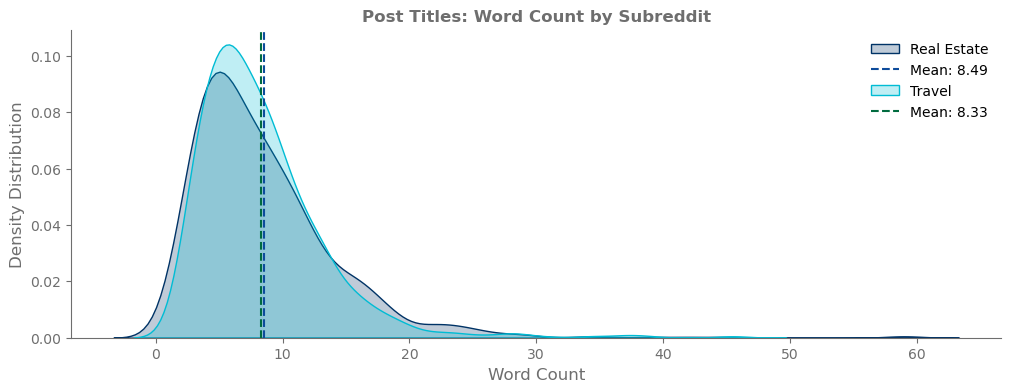

In [371]:
plot_density(col = 'post_title_wc',
             legend1 = 'Real Estate',
             legend2 = 'Travel',
             title = 'Post Titles: Word Count by Subreddit')

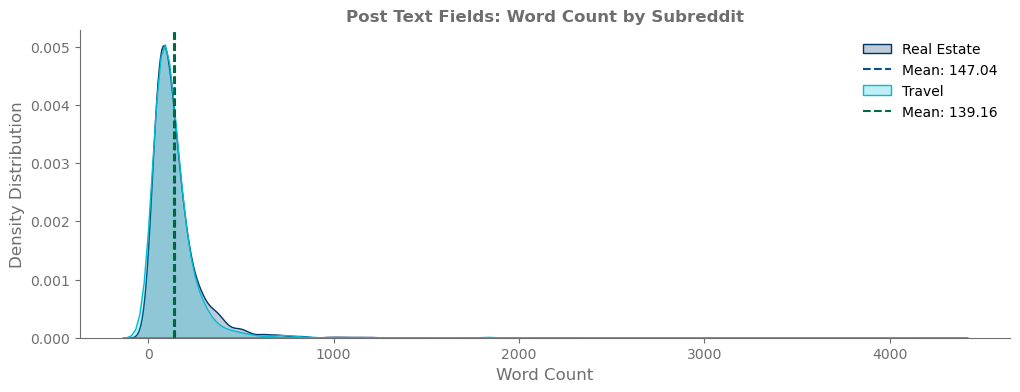

In [374]:
plot_density(col = 'post_text_wc',
             legend1 = 'Real Estate',
             legend2 = 'Travel',
             title = 'Post Text Fields: Word Count by Subreddit')